https://universe.roboflow.com/tmayolov8/four-corners-detection/dataset/6

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 15.5 MB/s eta 0:00:00


In [2]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/Four Corners Detection.v6i.yolov11.zip"
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Zip file extracted successfully.")
except FileNotFoundError:
    print(f"Error: The file {zip_file_path} was not found.")
except zipfile.BadZipFile:
    print("Error: The zip file is corrupted or invalid.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Zip file extracted successfully.


In [3]:
import cv2
import os

def extract_image_characteristics(image_path):
    """
    Extracts and prints the principal characteristics of an image using OpenCV.

    Args:
        image_path (str): The path to the image file.
    """
    try:
        # Load the image using OpenCV
        img = cv2.imread(image_path)

        if img is None:
            print(f"Error: Unable to load image at {image_path}. Check if the file exists or the path is correct.")
            return

        # Get image characteristics
        height, width, channels = img.shape

        print(f"Image Path: {image_path}")
        print(f"  - Width: {width} pixels")
        print(f"  - Height: {height} pixels")
        print(f"  - Number of Channels: {channels}")
        print(f"  - Image size: {os.path.getsize(image_path)} bytes")

        # Additional info like datatype can be useful
        print(f"  - Data Type: {img.dtype}")


    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
image_path = "/content/train/images/0000_jpg.rf.31c56b1e20c2df47ef0e7384fdfc51ab.jpg"
extract_image_characteristics(image_path)

Image Path: /content/train/images/0000_jpg.rf.31c56b1e20c2df47ef0e7384fdfc51ab.jpg
  - Width: 640 pixels
  - Height: 640 pixels
  - Number of Channels: 3
  - Image size: 118299 bytes
  - Data Type: uint8


In [4]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolo11n.pt")
model = YOLO("/content/drive/MyDrive/yolo11n.pt")

# Train the model
train_results = model.train(
    data="data.yaml",  # path to dataset YAML
    epochs=100,  # number of training epochs
    imgsz=640,  # training image size
    # device="cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
    name='docuvision'  # Nombre del experimento
)

# Evaluate model performance on the validation set
metrics = model.val()

# Perform object detection on an image
# results = model("path/to/image.jpg")
# results[0].show()

# Export the model to ONNX format
# path = model.export(format="onnx")  # return path to exported model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolo11n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=docuvision, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0

100%|██████████| 755k/755k [00:00<00:00, 3.19MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 14.7MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 5720 images, 52 backgrounds, 0 corrupt: 100%|██████████| 5720/5720 [00:03<00:00, 1606.82it/s]

train: WARNING ⚠️ /content/train/images/0023_jpg.rf.90ed3b41aec4450fae42138af23eb2e4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/0023_jpg.rf.952e6bcbc54c8a9655b9c4a3e69e1762.jpg: 1 duplicate labels removed


train: New cache created: /content/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7946, len(boxes) = 7984. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/valid/labels... 747 images, 1 backgrounds, 0 corrupt: 100%|██████████| 747/747 [00:01<00:00, 454.05it/s]


val: New cache created: /content/valid/labels.cache
Plotting labels to runs/detect/docuvision/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/docuvision
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.58G     0.9068      1.412      1.363         26        640: 100%|██████████| 358/358 [02:10<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:10<00:00,  2.23it/s]

                   all        747       1021      0.721      0.734      0.718      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.41G      0.976      1.014      1.399         26        640: 100%|██████████| 358/358 [02:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.67it/s]


                   all        747       1021      0.746      0.728      0.744      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.41G     0.9781     0.9469       1.41         15        640: 100%|██████████| 358/358 [02:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.69it/s]

                   all        747       1021      0.738      0.678      0.697      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.4G     0.9478     0.9064      1.383         25        640: 100%|██████████| 358/358 [01:58<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.70it/s]

                   all        747       1021      0.815      0.736      0.786      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.37G     0.8834     0.8316      1.335         21        640: 100%|██████████| 358/358 [01:57<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.62it/s]

                   all        747       1021      0.857      0.838      0.841      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.39G     0.8522     0.7845      1.309         17        640: 100%|██████████| 358/358 [01:59<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.59it/s]

                   all        747       1021      0.847      0.816       0.83      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.37G     0.8214     0.7482      1.287         28        640: 100%|██████████| 358/358 [02:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.69it/s]

                   all        747       1021      0.865      0.836      0.853      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.42G      0.809     0.7448      1.286         24        640: 100%|██████████| 358/358 [02:00<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.89it/s]

                   all        747       1021      0.866      0.832      0.839       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.38G     0.7779     0.7009      1.259         25        640: 100%|██████████| 358/358 [02:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.82it/s]


                   all        747       1021      0.855      0.825      0.844      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.38G     0.7501     0.6745      1.244         27        640: 100%|██████████| 358/358 [02:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.15it/s]

                   all        747       1021      0.856      0.851      0.863      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.37G     0.7583     0.6663      1.247         24        640: 100%|██████████| 358/358 [02:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.21it/s]

                   all        747       1021      0.799      0.683      0.738      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.37G      0.734     0.6515      1.229         19        640: 100%|██████████| 358/358 [02:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.70it/s]

                   all        747       1021      0.886      0.872      0.875      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.43G     0.7199     0.6357      1.214         27        640: 100%|██████████| 358/358 [02:06<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  4.00it/s]

                   all        747       1021      0.881      0.864      0.868      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.39G     0.7114     0.6271      1.215         25        640: 100%|██████████| 358/358 [02:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]

                   all        747       1021      0.889      0.856      0.863      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.37G     0.7047     0.6174      1.208         23        640: 100%|██████████| 358/358 [02:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.23it/s]

                   all        747       1021      0.907      0.861       0.88      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.37G     0.6885     0.5955      1.194         22        640: 100%|██████████| 358/358 [01:56<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.14it/s]

                   all        747       1021      0.875      0.882      0.888      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.37G     0.6789     0.5906       1.19         19        640: 100%|██████████| 358/358 [01:55<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.93it/s]

                   all        747       1021      0.905       0.86      0.888      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.39G     0.6902     0.5974        1.2         26        640: 100%|██████████| 358/358 [01:55<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.08it/s]

                   all        747       1021      0.888      0.875       0.88      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.37G     0.6658     0.5769      1.182         21        640: 100%|██████████| 358/358 [01:55<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.73it/s]

                   all        747       1021      0.913      0.866      0.893      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.37G     0.6661     0.5788      1.183         23        640: 100%|██████████| 358/358 [01:55<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.73it/s]

                   all        747       1021      0.905      0.893      0.893      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.37G     0.6507     0.5573      1.176         31        640: 100%|██████████| 358/358 [01:55<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.11it/s]

                   all        747       1021      0.909      0.882       0.89      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.37G     0.6412     0.5549      1.166         23        640: 100%|██████████| 358/358 [01:57<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]

                   all        747       1021      0.889      0.874      0.873      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.39G      0.643     0.5571      1.167         18        640: 100%|██████████| 358/358 [02:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.15it/s]

                   all        747       1021      0.912      0.882        0.9      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.37G     0.6388     0.5395      1.166         32        640: 100%|██████████| 358/358 [01:59<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.15it/s]

                   all        747       1021      0.895      0.889      0.893       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.38G     0.6318     0.5389      1.159         24        640: 100%|██████████| 358/358 [02:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.01it/s]

                   all        747       1021      0.926      0.879      0.905      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.39G      0.633      0.535      1.162         28        640: 100%|██████████| 358/358 [02:00<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.16it/s]

                   all        747       1021      0.899      0.896      0.904        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.4G     0.6334     0.5431      1.159         25        640: 100%|██████████| 358/358 [02:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.08it/s]

                   all        747       1021      0.916      0.875      0.891      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.38G     0.6277     0.5333      1.159         24        640: 100%|██████████| 358/358 [02:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.36it/s]

                   all        747       1021      0.918      0.889      0.906      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.38G     0.6171     0.5239       1.15         22        640: 100%|██████████| 358/358 [02:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.73it/s]

                   all        747       1021      0.912       0.89      0.903      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.37G     0.6154     0.5233      1.147         26        640: 100%|██████████| 358/358 [01:59<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.60it/s]

                   all        747       1021      0.927      0.883      0.899      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.39G     0.6169     0.5246      1.145         23        640: 100%|██████████| 358/358 [01:59<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.95it/s]

                   all        747       1021      0.915       0.89      0.903      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.39G     0.5956     0.5014      1.132         20        640: 100%|██████████| 358/358 [02:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.10it/s]


                   all        747       1021      0.931      0.889      0.906      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.43G     0.5959     0.5056      1.134         37        640: 100%|██████████| 358/358 [02:02<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.57it/s]

                   all        747       1021      0.913      0.892      0.895      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.39G     0.6085     0.5146      1.139         26        640: 100%|██████████| 358/358 [02:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.94it/s]

                   all        747       1021       0.91      0.896      0.895      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.4G     0.5965     0.5075      1.132         23        640: 100%|██████████| 358/358 [02:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.03it/s]


                   all        747       1021       0.92      0.896      0.913      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.37G     0.5852     0.4928       1.13         23        640: 100%|██████████| 358/358 [02:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  4.00it/s]

                   all        747       1021      0.932      0.894      0.911      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.37G     0.5897     0.5025       1.13         23        640: 100%|██████████| 358/358 [02:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.96it/s]

                   all        747       1021      0.934       0.88      0.897      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.42G     0.5868     0.4939      1.127         23        640: 100%|██████████| 358/358 [02:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.85it/s]

                   all        747       1021      0.931      0.886      0.909      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.37G     0.5804     0.4814      1.125         25        640: 100%|██████████| 358/358 [02:00<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.09it/s]

                   all        747       1021      0.909      0.896      0.906      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.4G     0.5724      0.489      1.119         15        640: 100%|██████████| 358/358 [02:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.13it/s]

                   all        747       1021      0.931      0.887      0.911      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.4G     0.5716     0.4832      1.115         23        640: 100%|██████████| 358/358 [02:00<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]

                   all        747       1021      0.927      0.884      0.904      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.37G     0.5683     0.4787      1.114         32        640: 100%|██████████| 358/358 [02:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.94it/s]

                   all        747       1021      0.937      0.886      0.909      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.39G     0.5574     0.4639      1.111         33        640: 100%|██████████| 358/358 [02:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.81it/s]

                   all        747       1021      0.926      0.879      0.905      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.39G      0.567     0.4777      1.114         24        640: 100%|██████████| 358/358 [02:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.18it/s]

                   all        747       1021      0.931      0.892      0.909      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.38G     0.5598     0.4687      1.105         29        640: 100%|██████████| 358/358 [01:58<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.04it/s]

                   all        747       1021      0.934      0.891      0.909      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.37G     0.5575     0.4725      1.108         27        640: 100%|██████████| 358/358 [01:57<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.97it/s]


                   all        747       1021      0.932      0.897      0.917      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.39G     0.5482     0.4626      1.103         21        640: 100%|██████████| 358/358 [01:58<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.90it/s]

                   all        747       1021       0.94      0.891      0.916      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.37G     0.5514     0.4544      1.102         27        640: 100%|██████████| 358/358 [01:56<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.66it/s]

                   all        747       1021      0.934      0.894      0.911       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.39G     0.5432     0.4514      1.096         17        640: 100%|██████████| 358/358 [01:56<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.95it/s]

                   all        747       1021      0.931      0.897      0.911      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.38G     0.5548     0.4586      1.105         28        640: 100%|██████████| 358/358 [01:57<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.48it/s]

                   all        747       1021      0.927      0.896      0.912      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.37G     0.5361     0.4404      1.092         23        640: 100%|██████████| 358/358 [01:59<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.69it/s]

                   all        747       1021      0.922        0.9      0.913      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.37G     0.5404     0.4542        1.1         25        640: 100%|██████████| 358/358 [01:59<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.06it/s]

                   all        747       1021      0.931       0.89      0.915      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.39G     0.5284     0.4364       1.09         31        640: 100%|██████████| 358/358 [01:58<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.09it/s]

                   all        747       1021      0.932      0.894      0.907      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.37G     0.5297     0.4467       1.09         27        640: 100%|██████████| 358/358 [02:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.97it/s]

                   all        747       1021      0.921      0.897      0.914      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.37G     0.5296     0.4366      1.087         21        640: 100%|██████████| 358/358 [02:00<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.13it/s]

                   all        747       1021      0.948      0.881      0.913      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.37G     0.5324     0.4426      1.097         19        640: 100%|██████████| 358/358 [02:00<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.57it/s]

                   all        747       1021       0.93       0.89      0.912      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.37G     0.5211     0.4323      1.083         31        640: 100%|██████████| 358/358 [01:58<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.21it/s]

                   all        747       1021       0.93      0.895      0.915      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.37G     0.5197     0.4343      1.084         17        640: 100%|██████████| 358/358 [01:57<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.83it/s]

                   all        747       1021      0.939      0.891      0.919      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.39G     0.5164     0.4266      1.079         24        640: 100%|██████████| 358/358 [01:59<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.81it/s]

                   all        747       1021      0.948      0.887      0.918      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.37G     0.5148     0.4185      1.079         32        640: 100%|██████████| 358/358 [01:57<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.77it/s]

                   all        747       1021      0.942      0.891      0.914      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.37G     0.5071     0.4218      1.076         22        640: 100%|██████████| 358/358 [01:58<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.65it/s]

                   all        747       1021      0.924      0.903      0.913      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.38G     0.5128     0.4251       1.08         17        640: 100%|██████████| 358/358 [01:58<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.72it/s]

                   all        747       1021      0.935      0.894      0.917      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.4G     0.5098     0.4226      1.078         23        640: 100%|██████████| 358/358 [01:57<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.73it/s]

                   all        747       1021      0.943      0.895      0.916      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.37G     0.5037     0.4145      1.068         20        640: 100%|██████████| 358/358 [01:59<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.70it/s]

                   all        747       1021      0.938      0.891      0.915      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.4G     0.5083     0.4158      1.076         34        640: 100%|██████████| 358/358 [01:59<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.59it/s]

                   all        747       1021      0.946      0.885      0.916      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.37G     0.5053     0.4208      1.075         47        640: 100%|██████████| 358/358 [01:59<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.68it/s]

                   all        747       1021      0.937      0.897      0.909      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.37G     0.4991     0.4075       1.07         22        640: 100%|██████████| 358/358 [01:57<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.72it/s]

                   all        747       1021      0.933      0.896      0.914      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.38G     0.4992     0.4116      1.072         21        640: 100%|██████████| 358/358 [01:57<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.13it/s]

                   all        747       1021      0.945       0.89      0.917      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.37G     0.4927     0.4065      1.066         24        640: 100%|██████████| 358/358 [01:58<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.48it/s]

                   all        747       1021      0.945       0.89      0.919      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.37G     0.4945      0.407      1.069         16        640: 100%|██████████| 358/358 [01:59<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.78it/s]

                   all        747       1021      0.946      0.896      0.919      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.39G     0.4925     0.4058      1.063         24        640: 100%|██████████| 358/358 [02:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.05it/s]

                   all        747       1021      0.941      0.899      0.917      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.37G     0.4905     0.4058      1.067         26        640: 100%|██████████| 358/358 [02:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.12it/s]

                   all        747       1021      0.943      0.894      0.918      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.37G     0.4781     0.3968      1.057         20        640: 100%|██████████| 358/358 [02:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.73it/s]

                   all        747       1021      0.948      0.893      0.919      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.37G     0.4814     0.3914      1.058         23        640: 100%|██████████| 358/358 [02:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  4.00it/s]

                   all        747       1021      0.949      0.899      0.919      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.38G     0.4766     0.3898       1.06         37        640: 100%|██████████| 358/358 [02:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.04it/s]

                   all        747       1021      0.939      0.899       0.92      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.4G     0.4749     0.3899      1.058         27        640: 100%|██████████| 358/358 [02:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.02it/s]

                   all        747       1021      0.934      0.903      0.922      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.37G     0.4729     0.3853      1.057         19        640: 100%|██████████| 358/358 [02:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.90it/s]

                   all        747       1021      0.936      0.892      0.919      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.37G     0.4716     0.3829      1.053         22        640: 100%|██████████| 358/358 [02:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.00it/s]

                   all        747       1021      0.942      0.892      0.919      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.39G     0.4712     0.3859      1.051         25        640: 100%|██████████| 358/358 [02:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.08it/s]

                   all        747       1021      0.935      0.897      0.918       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.37G     0.4702     0.3834      1.055         22        640: 100%|██████████| 358/358 [01:59<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.13it/s]

                   all        747       1021      0.943      0.892      0.917      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.37G     0.4627     0.3796      1.047         27        640: 100%|██████████| 358/358 [01:58<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.12it/s]

                   all        747       1021      0.939      0.896      0.916       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.37G     0.4622     0.3766      1.047         29        640: 100%|██████████| 358/358 [02:00<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.70it/s]

                   all        747       1021      0.942      0.891      0.917      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.4G     0.4598     0.3741      1.048         24        640: 100%|██████████| 358/358 [02:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.53it/s]

                   all        747       1021      0.935      0.898      0.918      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.37G     0.4561     0.3738      1.047         25        640: 100%|██████████| 358/358 [02:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.27it/s]

                   all        747       1021      0.942      0.894      0.914      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.39G     0.4633     0.3761      1.049         28        640: 100%|██████████| 358/358 [02:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.74it/s]

                   all        747       1021      0.939      0.897      0.917      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.37G     0.4474     0.3666       1.04         25        640: 100%|██████████| 358/358 [02:00<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.73it/s]

                   all        747       1021      0.943      0.898       0.92      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.39G     0.4537     0.3714      1.043         24        640: 100%|██████████| 358/358 [01:59<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.60it/s]

                   all        747       1021      0.938      0.901      0.919      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.37G     0.4521     0.3687      1.037         19        640: 100%|██████████| 358/358 [01:59<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.92it/s]

                   all        747       1021      0.943      0.893      0.917      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.39G      0.443      0.367      1.037         18        640: 100%|██████████| 358/358 [02:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.51it/s]

                   all        747       1021      0.941        0.9      0.919      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.39G     0.4428     0.3606      1.037         35        640: 100%|██████████| 358/358 [02:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.98it/s]

                   all        747       1021      0.939        0.9      0.919      0.855


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.45G     0.3594      0.297      1.003         14        640: 100%|██████████| 358/358 [02:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.85it/s]

                   all        747       1021      0.935        0.9      0.919      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.38G     0.3398     0.2762     0.9845         14        640: 100%|██████████| 358/358 [01:57<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.50it/s]

                   all        747       1021      0.937      0.895      0.918      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.38G     0.3377     0.2721     0.9783          9        640: 100%|██████████| 358/358 [01:58<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.40it/s]

                   all        747       1021      0.927      0.904      0.919       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.38G     0.3295     0.2681     0.9769         15        640: 100%|██████████| 358/358 [01:58<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.91it/s]

                   all        747       1021      0.937      0.894      0.919       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.38G     0.3281     0.2621     0.9746          8        640: 100%|██████████| 358/358 [01:58<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.30it/s]

                   all        747       1021      0.934      0.897      0.919      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.38G     0.3245     0.2637     0.9706          9        640: 100%|██████████| 358/358 [01:57<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:09<00:00,  2.56it/s]

                   all        747       1021      0.937      0.892       0.92       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.38G     0.3227     0.2603     0.9753         10        640: 100%|██████████| 358/358 [01:57<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.32it/s]

                   all        747       1021      0.934      0.899      0.921       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.38G     0.3222     0.2602     0.9745         11        640: 100%|██████████| 358/358 [01:59<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.97it/s]

                   all        747       1021      0.939      0.892      0.921       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.38G     0.3195     0.2596     0.9686         10        640: 100%|██████████| 358/358 [01:57<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.07it/s]

                   all        747       1021      0.939      0.894      0.921      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.38G     0.3156      0.252     0.9625         11        640: 100%|██████████| 358/358 [01:56<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:08<00:00,  2.74it/s]

                   all        747       1021      0.939      0.894       0.92      0.862



100 epochs completed in 3.568 hours.
Optimizer stripped from runs/detect/docuvision/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/docuvision/weights/best.pt, 5.5MB

Validating runs/detect/docuvision/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.12it/s]


                   all        747       1021      0.937      0.898      0.922      0.862
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/docuvision
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/valid/labels.cache... 747 images, 1 backgrounds, 0 corrupt: 100%|██████████| 747/747 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:08<00:00,  5.50it/s]


                   all        747       1021      0.936      0.897      0.921      0.862
Speed: 0.3ms preprocess, 4.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/docuvision2


In [5]:
import os
import zipfile
from google.colab import files

def zip_and_download_folder(folder_path, zip_name):
    """Zips a folder and downloads it."""
    zip_path = f"{zip_name}.zip"
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files_in_folder in os.walk(folder_path):
            for file in files_in_folder:
                zipf.write(os.path.join(root, file),
                           os.path.relpath(os.path.join(root, file),
                                           folder_path))
    files.download(zip_path)

# Zip and download the runs folder
zip_and_download_folder("/content/runs", "runs")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


image 1/1 /content/train/images/0000_jpg.rf.31c56b1e20c2df47ef0e7384fdfc51ab.jpg: 640x640 1 object, 12.6ms
Speed: 2.8ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


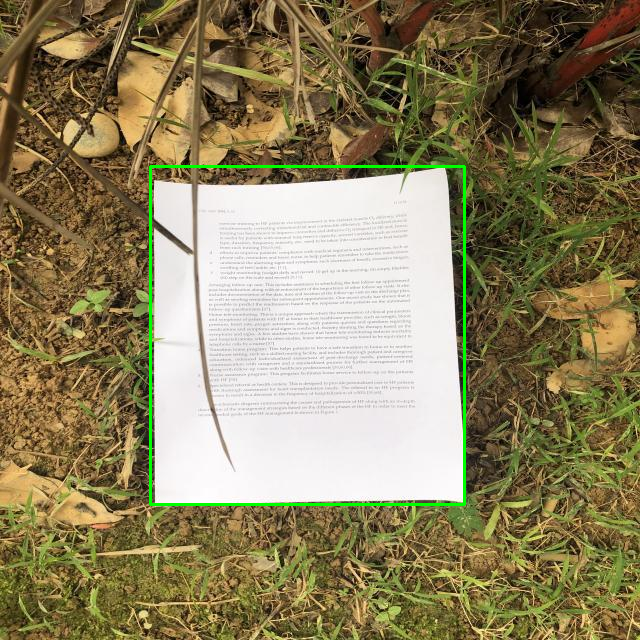

In [6]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the trained model
model = YOLO("/content/runs/detect/docuvision/weights/best.pt")

# Replace with the path to your test image
test_image_path = "/content/train/images/0000_jpg.rf.31c56b1e20c2df47ef0e7384fdfc51ab.jpg"

# Perform inference
results = model(test_image_path)

# Display results
for result in results:
    boxes = result.boxes.cpu().numpy()
    image = cv2.imread(test_image_path)
    for box in boxes:
      b = box.xyxy[0].astype(int)
      cv2.rectangle(image, (b[0], b[1]), (b[2], b[3]), (0, 255, 0), 2)
    cv2_imshow(image)